### 형태소 분석기 import

In [68]:
from konlpy.tag import Okt
okt = Okt()

### 데이터 불러오기

In [69]:
import pandas as pd
df = pd.read_csv('housewarming2.csv')
df2 = pd.read_csv('style_code.csv')

In [70]:
ohou = pd.concat([df, df2], axis=1)
ohou.drop(['Unnamed: 0'], axis = 1, inplace=True)
ohou.head()

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,...,한국&아시아,러블리&로맨틱,빈티지&레트로,인더스트리얼,모던,프렌치&프로방스,유니크&믹스매치,내추럴,미니멀&심플,북유럽
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,...,0,0,0,0,0,0,0,1,0,0
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,...,0,0,0,0,1,0,0,0,0,0
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,...,0,0,0,0,0,0,0,1,0,0
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,...,0,0,0,0,1,0,0,0,0,0
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,...,0,0,0,0,0,0,0,1,0,0


In [71]:
ohou.columns

Index(['id', '작성일', '제목', '가족형태', '공간', '평수구간', '스타일', '세부공사', '분야', '작업',
       '예산', '조회', '스크랩', '좋아요', '댓글', 'url', '클래식&앤틱', '한국&아시아', '러블리&로맨틱',
       '빈티지&레트로', '인더스트리얼', '모던', '프렌치&프로방스', '유니크&믹스매치', '내추럴', '미니멀&심플',
       '북유럽'],
      dtype='object')

### 워드 클라우드 함수 정의

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
                    
    wordcloud = WordCloud(
                        font_path = 'NanumGothic.ttf',                  # 폰트 설정
                        stopwords = STOPWORDS,                          # 불용어 제거
                        background_color = backgroundcolor,             # # 배경색 설정 
                        # max_words = 100,                                # 단어가 많이 나오면 복잡하니까 최대 100개만 보게 설정
                        #mask=mask,                                      # 워드클라우드에 적용할 이미지
                        width = width, height = height).generate(data)  # 크기 설정
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

### 토크나이저 함수 정의

In [92]:
text = "블랙&그린, 대비의 美가 펼쳐진 'HOUSE H"

In [93]:
title_nouns = okt.nouns(text)
title_nouns

['블랙', '그린', '대비']

In [94]:
title_morphs = okt.morphs(text)
title_morphs

['블랙', '&', '그린', ',', '대비', '의', '美', '가', '펼쳐진', "'", 'HOUSE', 'H']

In [95]:
title_pos = okt.pos(text)
title_pos

[('블랙', 'Noun'),
 ('&', 'Punctuation'),
 ('그린', 'Noun'),
 (',', 'Punctuation'),
 ('대비', 'Noun'),
 ('의', 'Josa'),
 ('美', 'Foreign'),
 ('가', 'Verb'),
 ('펼쳐진', 'Verb'),
 ("'", 'Punctuation'),
 ('HOUSE', 'Alpha'),
 ('H', 'Alpha')]

In [73]:
def title_wordcloud(text):
    title_keyword = []
    title_pos = okt.pos(''.join(text)) # 품사 태깅
    
    for x,y in title_pos:
        if y in ['Noun', 'Adjective']: # 뽑아낼 품사
            if len(x) > 1:                        # 단어의 길이가 1이면 제거
                title_keyword.append(x)
    displayWordCloud(' '.join(title_keyword))     # 워드 클라우드 그리기

### 불용어 사전 만들기

In [74]:
# 불용어 사전을 가져와서 set으로 변환
file_path = './korean_stopwords.txt'

with open(file_path, encoding='utf-8') as f:
    stopwords = f.readlines()

STOPWORDS = {line.rstrip('\n') for line in stopwords}
# STOPWORDS

In [77]:
# 자주 등장하지만, 의미없는 단어(불용어)
stopwords_add = {'아파트', '인테리어', '공간', '있는', '신혼집', '주택', '하우스', '리모델링', '취향'} # 워드 클라우드 그려보면서 불용어 계속 추가
for word in stopwords_add:
    STOPWORDS.add(word)
# STOPWORDS

### 워드 클라우드 그리기

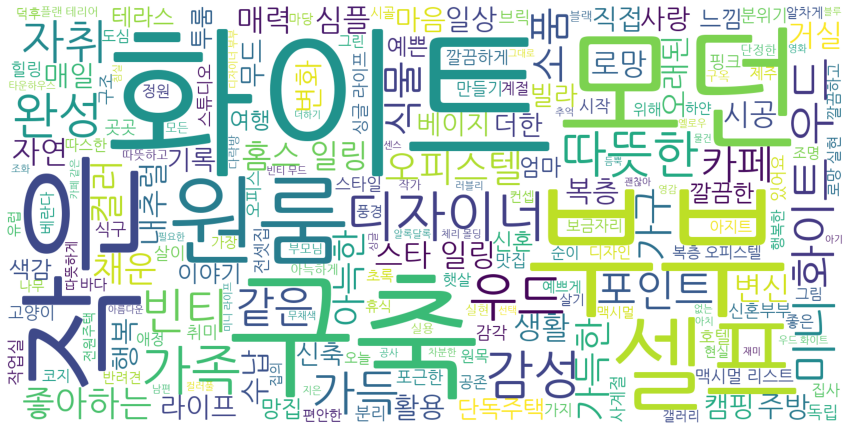

In [88]:
title_wordcloud(ohou['제목'])

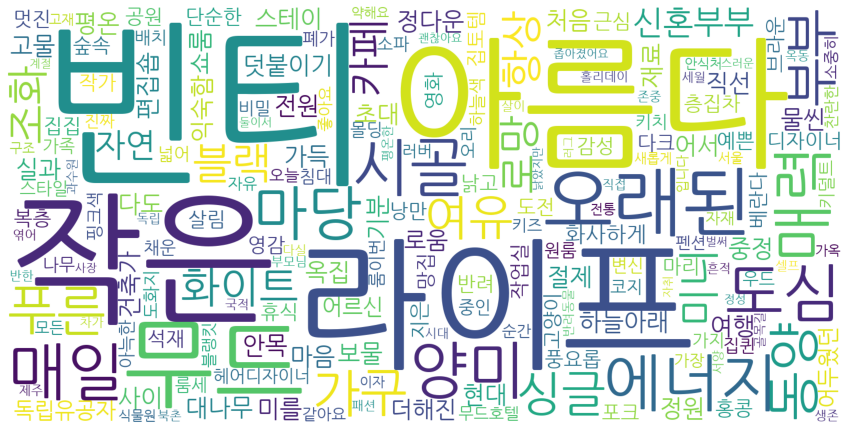

In [79]:
title = ohou.loc[ohou['한국&아시아'] == 1, '제목']
title_wordcloud(title)

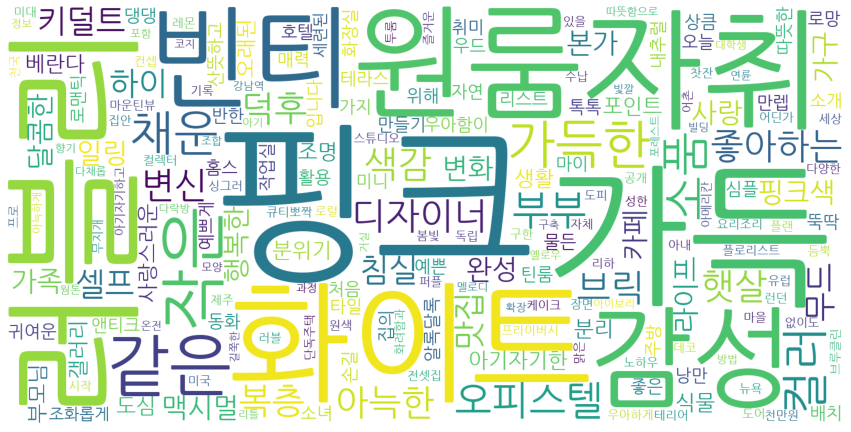

In [80]:
title = ohou.loc[ohou['러블리&로맨틱'] == 1, "제목"]
title_wordcloud(title)

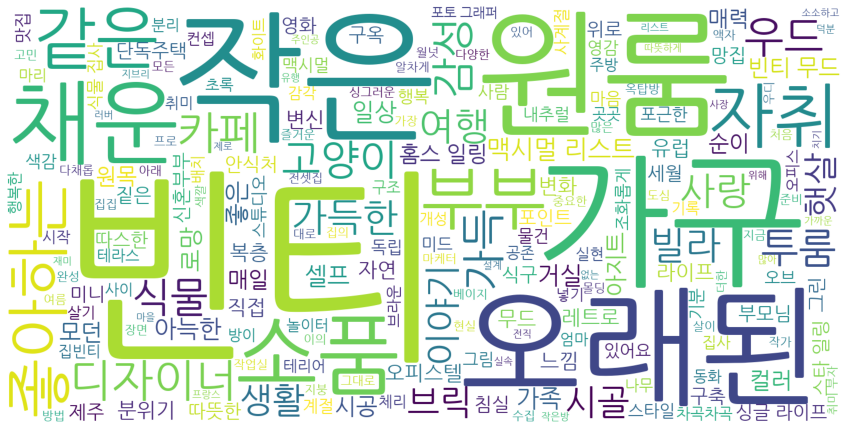

In [81]:
title = ohou.loc[ohou['빈티지&레트로'] == 1, '제목']
title_wordcloud(title)

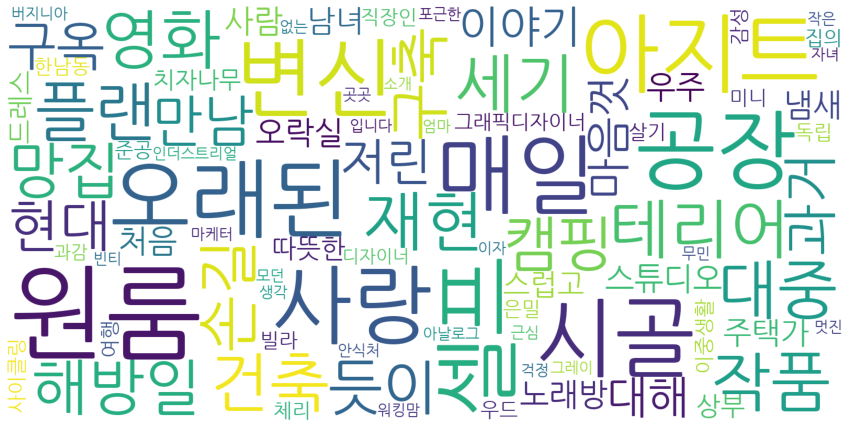

In [82]:
title = ohou.loc[ohou['인더스트리얼'] == 1, '제목']
title_wordcloud(title)

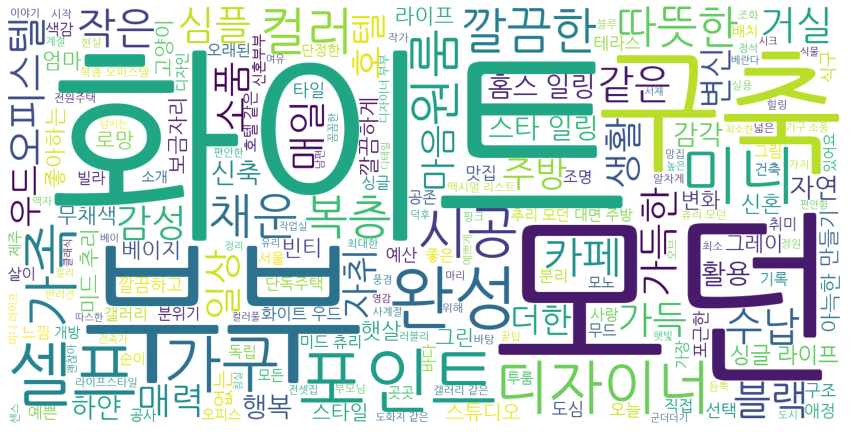

In [83]:
title = ohou.loc[ohou['모던'] == 1, '제목']
title_wordcloud(title)

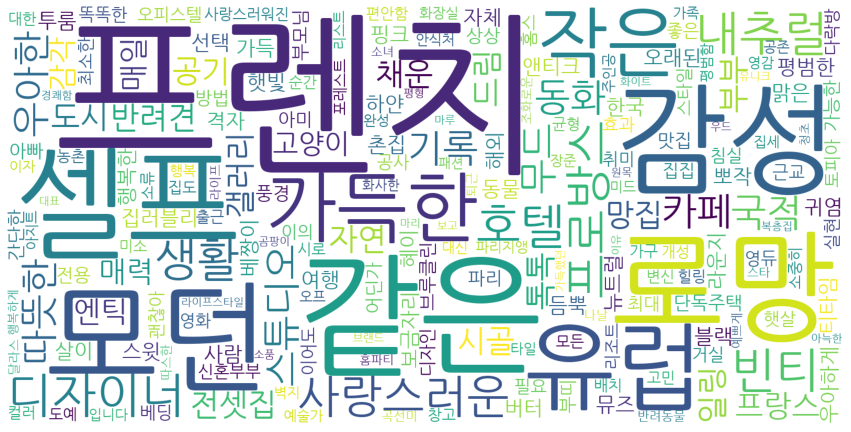

In [84]:
title = ohou.loc[ohou['프렌치&프로방스'] == 1, '제목']
title_wordcloud(title)

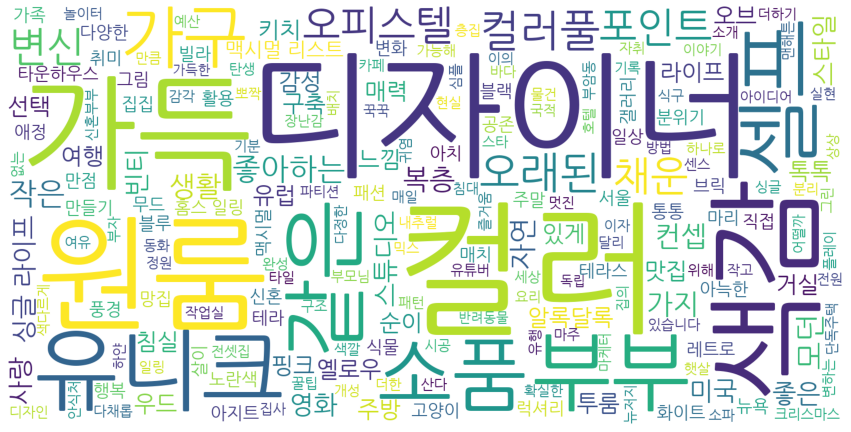

In [85]:
title = ohou.loc[ohou['유니크&믹스매치'] == 1, '제목']
title_wordcloud(title)

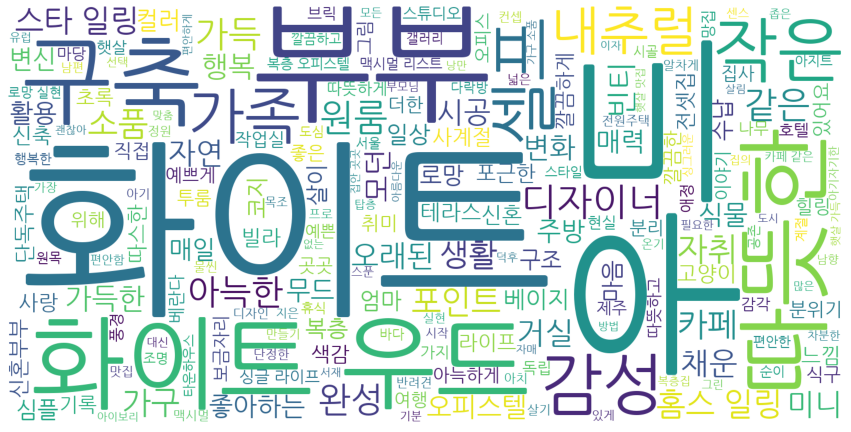

In [86]:
title = ohou.loc[ohou['내추럴'] == 1, '제목']
title_wordcloud(title)

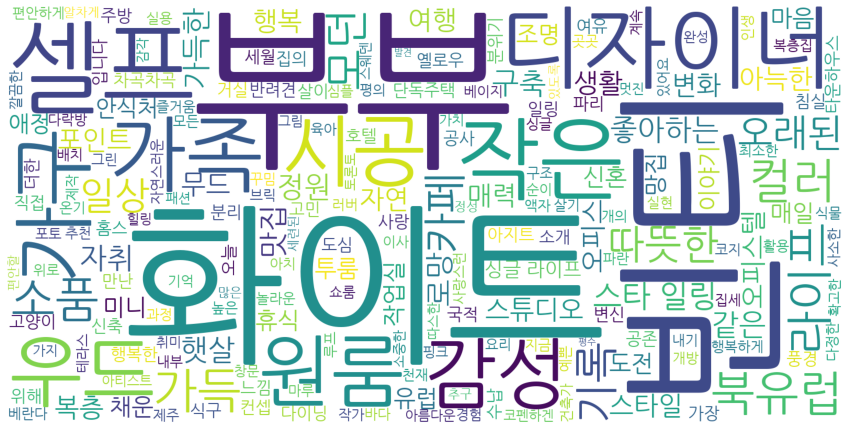

In [87]:
title = ohou.loc[ohou['북유럽'] == 1, '제목']
title_wordcloud(title)

### 논의사항
- 형태소 분석기 선정
  어떤 형태소를 사용하든 직접 커스텀 필요(이용자 사전 추가)
  ex) 빈티지 -> 빈티지를 사전에 추가해서 빈티, 지로 쪼개지는 것을 보완해야 함
- 품사 선정
- 의문점
  제목이 스타일을 반영하지 않는 경우도 많다.(중복으로 스타일을 넣은 경우 대표 스타일 하나만 정하게는게 좋지 않을까?)
- 워드 클라우드가 시각적으로 보기 좋지 않다는 생각도 들었음(불용어 제거 문제도 있고 스타일 카테고리도 많음. 차라리 크기 순으로 봤을     때 관렸있는 단어를 우리가 뽑아보는 것은 어떨까?)